# MINI PROJECT

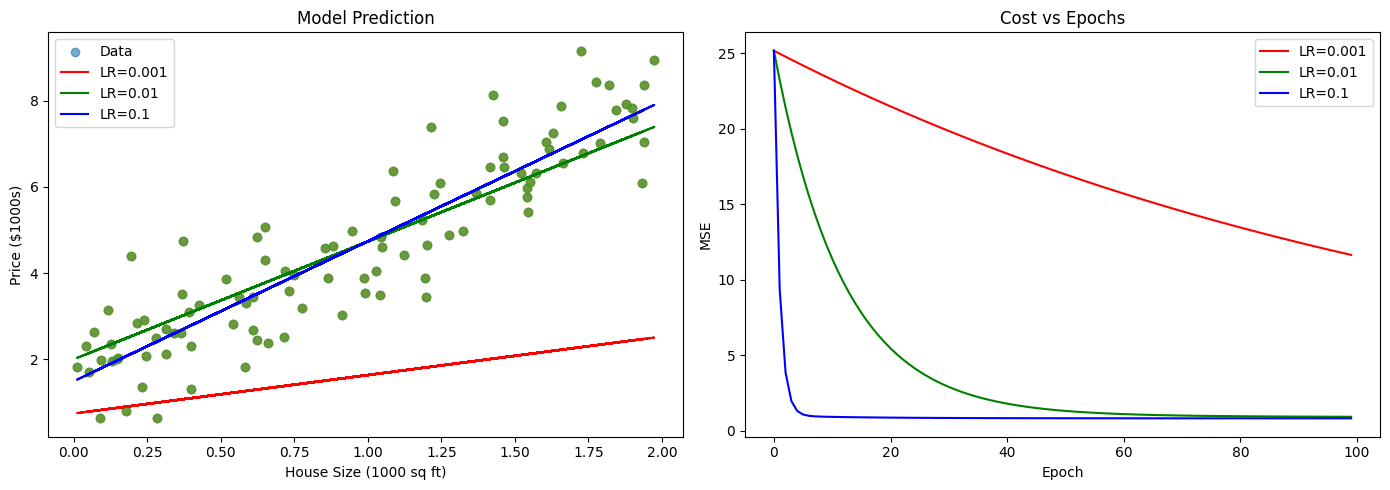

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # House size (in 1000 sq ft)
true_w = 3.5
true_b = 1.25
noise = np.random.randn(100, 1)

y = true_w * X + true_b + noise  # Price in $1000s

# 2. Define cost function (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# 3. Gradient Descent function
def gradient_descent(X, y, lr=0.1, epochs=100):
    n = len(X)
    w = 0.0
    b = 0.0
    cost_list = []

    for i in range(epochs):
        y_pred = w * X + b
        error = y - y_pred

        dw = (-2/n) * np.sum(X * error)
        db = (-2/n) * np.sum(error)

        w -= lr * dw
        b -= lr * db

        cost = mse(y, y_pred)
        cost_list.append(cost)

    return w, b, cost_list

# 4. Try different learning rates
lrs = [0.001, 0.01, 0.1]
colors = ['r', 'g', 'b']

plt.figure(figsize=(14, 5))

for i, lr in enumerate(lrs):
    w, b, cost_list = gradient_descent(X, y, lr=lr, epochs=100)

    # Subplot 1: Model Prediction
    plt.subplot(1, 2, 1)
    y_pred = w * X + b
    plt.scatter(X, y, alpha=0.6, label='Data' if i==0 else "")
    plt.plot(X, y_pred, color=colors[i], label=f'LR={lr}')
    plt.xlabel('House Size (1000 sq ft)')
    plt.ylabel('Price ($1000s)')
    plt.title('Model Prediction')
    plt.legend()

    # Subplot 2: Cost over Epochs
    plt.subplot(1, 2, 2)
    plt.plot(cost_list, color=colors[i], label=f'LR={lr}')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('Cost vs Epochs')
    plt.legend()

plt.tight_layout()
plt.show()
